# **Participation à un concours sur la Smart City**

Réalisation d'une analyse exploratoire avec un <a href="https://opendata.paris.fr/explore/dataset/les-arbres/map/?dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6Imxlcy1hcmJyZXMiLCJvcHRpb25zIjp7fX0sImNoYXJ0cyI6W3siYWxpZ25Nb250aCI6dHJ1ZSwidHlwZSI6ImNvbHVtbiIsImZ1bmMiOiJBVkciLCJ5QXhpcyI6ImlkYmFzZSIsInNjaWVudGlmaWNEaXNwbGF5Ijp0cnVlLCJjb2xvciI6IiMwMDMzNjYifV0sInhBeGlzIjoidHlwZWVtcGxhY2VtZW50IiwibWF4cG9pbnRzIjo1MCwic29ydCI6IiJ9XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&disjunctive.typeemplacement&disjunctive.arrondissement&disjunctive.libellefrancais&disjunctive.genre&disjunctive.espece&disjunctive.varieteoucultivar&disjunctive.stadedeveloppement&disjunctive.remarquable&location=13,48.86844,2.30945&basemap=jawg.streets">jeu de données</a> portant sur les arbres de la ville de Paris, dans le cadre du programme “Végétalisons la ville”.

**Les résultats contribueront à une optimisation des tournées pour l’entretien des arbres de la ville.**
>Eh oui, moins de tournées égale moins de trajets, et plus d’arbres entretenus !

---

## Sommaire

<ol>
    <li><a href="#section1">Environnement de développement</a></li>
        <ol>
            <li><a href="#installation">Installation de l'environnement</a></li>
            <li><a href="#librairies_importation">Importation des librairies</a></li>
        </ol>
    <li><a href="#section2">Présentation générale du jeu de données</a></li>
        <ol>
            <li><a href="#importation">Importation du jeu de données</a></li>
            <li><a href="#data_description">Description du jeu de données</a></li>
            <li><a href="#missing_values">Valeurs manquantes</a></li>
            <li><a href="#doublons">Doublons</a></li>
            <li><a href="#nettoyage">Nettoyage</a></li>
        </ol>
    <li><a href="#section3">Démarche méthodologique d'analyse des données</a></li>
        <ol>
            <li><a href="#classif">Classification des données</a></li>
            <li><a href="#quali">Analyse univariée, variables qualitatives</a></li>
            <li><a href="#quanti">Analyse univariée, variables quantitatives</a></li>
            <li><a href="#aberrantes">Valeurs aberrantes</a></li>
            <li><a href="#bivariee">Analyse bivariée, circonférence et hauteur des arbres</a></li>
            <li><a href="#geo">Analyse géographique</a></li>
        </ol>
    <li><a href="#section4">Synthèse de l'analyse de données</a></li>
</ol>

<a id="section1"></a>
## 1. Environnement de développement

<a id="installation"></a>
### 1.1 Installation de l'environnement

Un environnement virtuel a été créé pour assurer l’isolement du projet et la gestion des dépendances.
Les informations de cet environnement (son nom et ses dépendances) sont précisées dans le fichier **environment.yml**

L'installation de l'environnement virtuel est possible à partir de ce fichier, dans un invite de commande lancer la commande :

<code>conda env create -f environment.yml</code>

<a id="librairies_importation"></a>
### 1.2 Importation des librairies

In [1]:
# Importation des librairies python spécialisées dans le Jupyter Notebook

%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import folium
from folium.plugins import HeatMap

<a id="section2"></a>
## 2. Présentation générale du jeu de données

<a id="importation"></a>
### 2.1 Importation du jeu de données vers un DataFrame

In [2]:
data = pd.read_csv("data/p2-arbres-fr.csv", sep=';')

type(data)

pandas.core.frame.DataFrame

On utilise la librairie pandas pour importer le jeu de données dans un objet appelé **DataFrame**, sur lequel on pourra utiliser plusieurs méthodes pour l'analyse des données

<a id="data_description"></a>
### 2.2 Description du jeu de données

In [3]:
# On récupère les dimensions du DataFrame dans des variables
shape = data.shape
size = data.size
print(f"Dimensions du DataFrame : {shape[0]} lignes et {shape[1]} colonnes\n")
print(f"Taille du DataFrame : {size} cellules\n")

#Quelques informations sur le DataFrame
print("Informations du DataFrame :\n")
print(data.info())

Dimensions du DataFrame : 200137 lignes et 18 colonnes

Taille du DataFrame : 3602466 cellules

Informations du DataFrame :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  

On récupère ci-dessus quelques informations concernant le jeu de données notamment ses dimensions :
- **200 137 lignes**
- **18 colonnes**
- 3 602 466 cellules au total

Ainsi que des informations sur les colonnes du jeu de données :
- le nom des colonnes
- le type des variables qui composent chaque colonne
- le nombre de celulles valorisées (Non-Null)

In [4]:
data.dtypes

id                       int64
type_emplacement        object
domanialite             object
arrondissement          object
complement_addresse     object
numero                 float64
lieu                    object
id_emplacement          object
libelle_francais        object
genre                   object
espece                  object
variete                 object
circonference_cm         int64
hauteur_m                int64
stade_developpement     object
remarquable            float64
geo_point_2d_a         float64
geo_point_2d_b         float64
dtype: object

Il y a ici 3 types de variables qui sont remontés :
- **float64** pour 4 colonnes, qui sont des Nombres à virgule
- **int64** pour 3 colonnes, qui sont des Nombres entiers
- **object** pour 11 colonnes, qui sont des valeurs non numériques (ou un mélange de valeurs numériques et non numériques)

In [5]:
data.head(10)

id type_emplacement domanialite   arrondissement complement_addresse  \
0  99874            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
1  99875            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
2  99876            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
3  99877            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
4  99878            Arbre      Jardin  PARIS 17E ARRDT                 NaN   
5  99879            Arbre      Jardin  PARIS 17E ARRDT                 NaN   
6  99880            Arbre      Jardin  PARIS 17E ARRDT                 NaN   
7  99881            Arbre      Jardin  PARIS 16E ARRDT                 NaN   
8  99882            Arbre      Jardin  PARIS 16E ARRDT                 NaN   
9  99883            Arbre      Jardin  PARIS 16E ARRDT                 NaN   

   numero                                               lieu id_emplacement  \
0     NaN          MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             19   
1     NaN          MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             20   
2     NaN          MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             21   
3     NaN          MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             22   
4     NaN         PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING       000G0037   
5     NaN         PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING       000G0036   
6     NaN         PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING       000G0035   
7     NaN  SQUARE ALEXANDRE ET RENE PARODI / 1 PLACE DE L...             35   
8     NaN           JARDIN DE L AVENUE FOCH / 10 AVENUE FOCH         802008   
9     NaN           JARDIN DE L AVENUE FOCH / 10 AVENUE FOCH         802009   

  libelle_francais      genre         espece variete  circonference_cm  \
0       Marronnier   Aesculus  hippocastanum     NaN                20   
1               If      Taxus        baccata     NaN                65   
2               If      Taxus        baccata     NaN                90   
3           Erable       Acer        negundo     NaN                60   
4     Arbre à miel  Tetradium      daniellii     NaN                38   
5     Arbre à miel  Tetradium      daniellii     NaN                38   
6     Arbre à miel  Tetradium      daniellii     NaN                37   
7          Platane   Platanus    x hispanica     NaN               260   
8          Sophora    Sophora       japonica     NaN               145   
9          Sophora    Sophora       japonica     NaN               135   

   hauteur_m stade_developpement  remarquable  geo_point_2d_a  geo_point_2d_b  
0          5                 NaN          0.0       48.857620        2.320962  
1          8                   A          NaN       48.857656        2.321031  
2         10                   A          NaN       48.857705        2.321061  
3          8                   A          NaN       48.857722        2.321006  
4          0                 NaN          NaN       48.890435        2.315289  
5          0                 NaN          NaN       48.890470        2.315228  
6          0                 NaN          NaN       48.890504        2.315168  
7         17                 NaN          NaN       48.876722        2.280222  
8         14                   A          0.0       48.871990        2.275814  
9         10                   A          0.0       48.872046        2.275752

<a id="missing_values"></a>
### 2.3 Valeurs manquantes

Affichage des valeurs manquantes en % puis avec des graphiques avec la librairie missingno

In [6]:
# Affichage des Nan en %
missing_values = pd.DataFrame((data.isna().mean()*100).sort_values())
missing_values.columns = ['Valeurs manquantes en %']
missing_values

Valeurs manquantes en %
id                                  0.000000
hauteur_m                           0.000000
circonference_cm                    0.000000
geo_point_2d_a                      0.000000
id_emplacement                      0.000000
lieu                                0.000000
geo_point_2d_b                      0.000000
arrondissement                      0.000000
type_emplacement                    0.000000
domanialite                         0.000500
genre                               0.007995
libelle_francais                    0.747988
espece                              0.875400
remarquable                        31.527404
stade_developpement                33.579498
variete                            81.624088
complement_addresse                84.559577
numero                            100.000000

<AxesSubplot:>

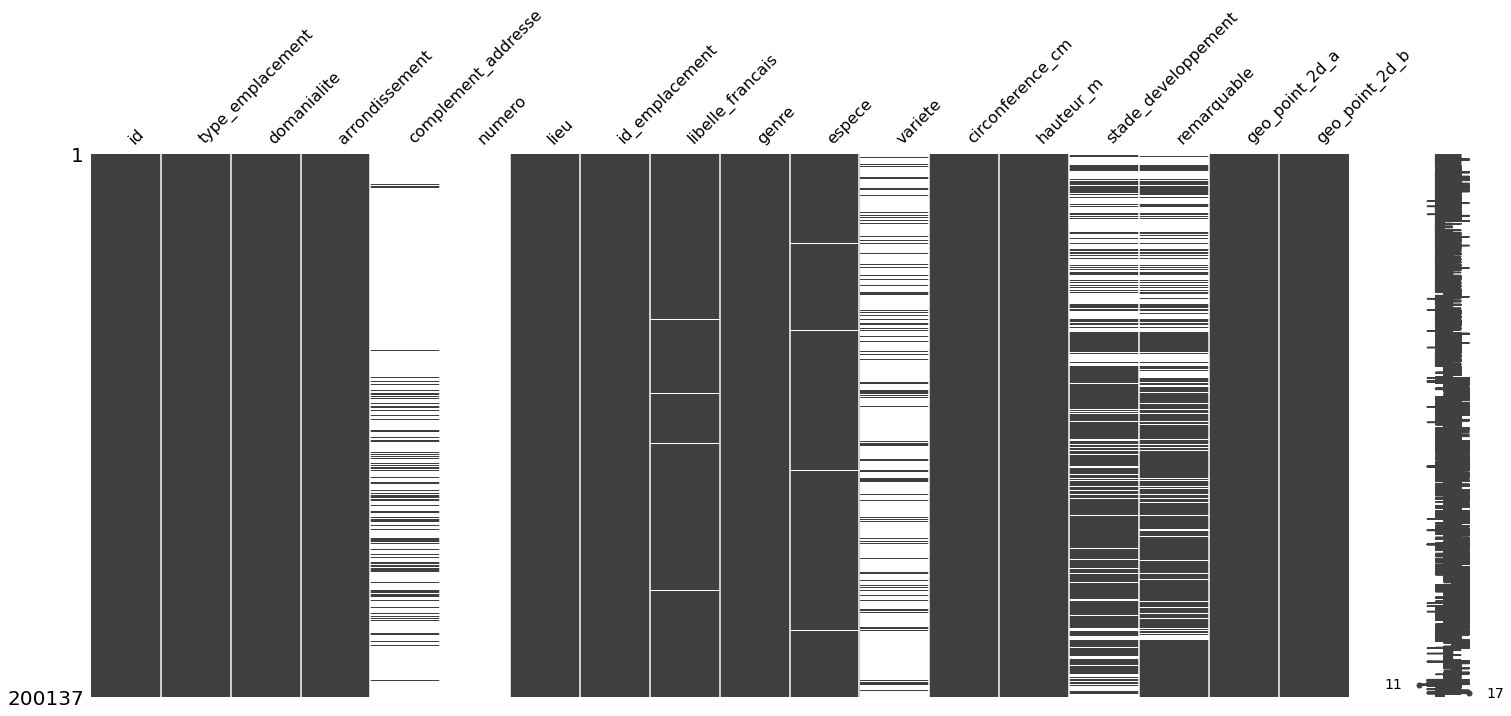

In [7]:
#Affichage visuel des NaN
msno.matrix(data)

<AxesSubplot:>

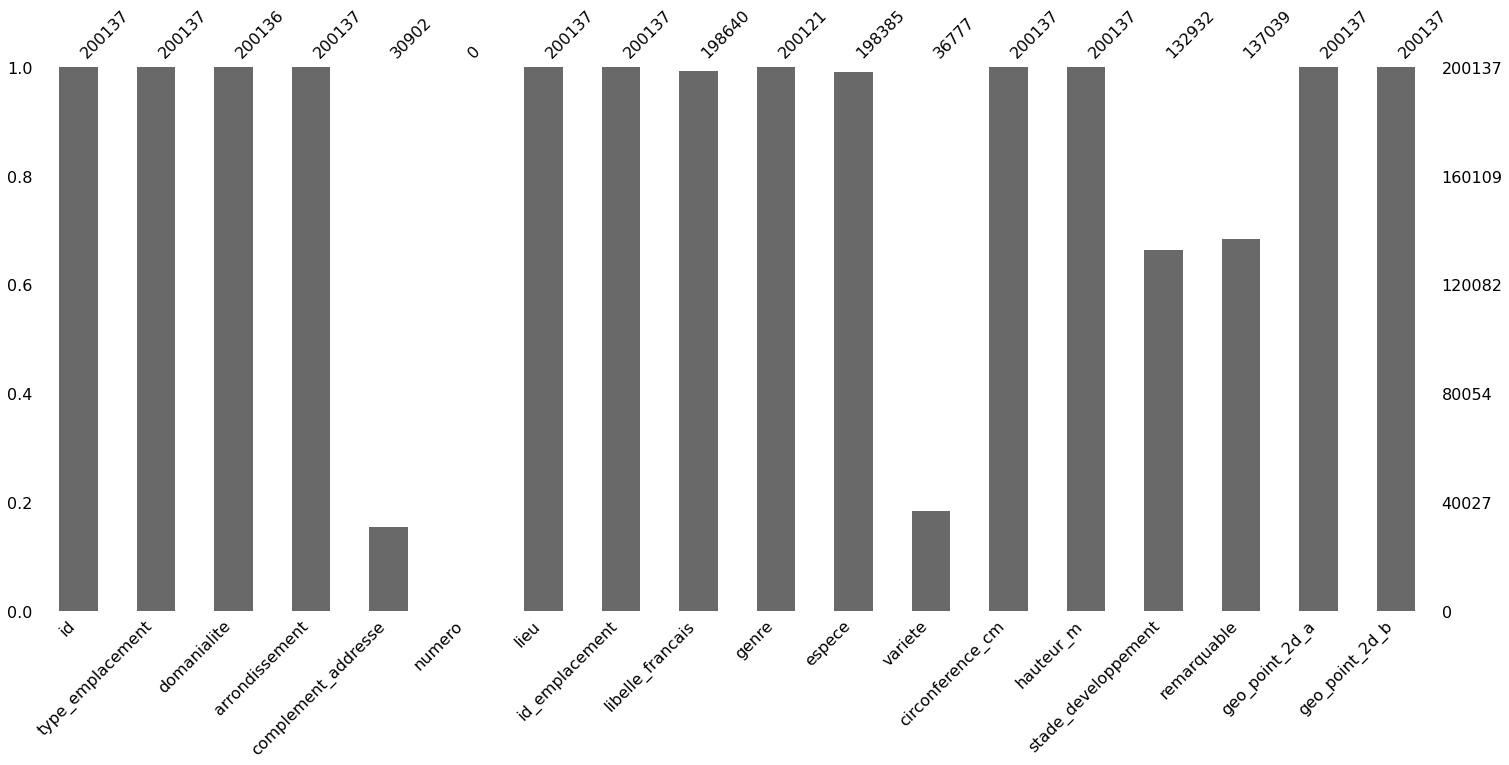

In [8]:
#Affichage visuel des NaN sous forme de diagramme en tuyaux d'orgue
msno.bar(data)

Analyse des colonnes contenant des Nan :
- **numero** : est totalement vide, on peut supprimer cette colonne.
- **complement_adresse** : valeurs manquantes supérieures à 75%, il sera difficile de venir corriger ces données.
- **variete** : valeurs manquantes supérieures à 75%, il sera difficile de venir corriger ces données.
- **stade_developpement** : 33.6% de valeurs manquantes, il est possible de trouver une corrélation entre le type de l'arbre et sa circonférence / taille, et d'estimer les valeurs NaN
- **remarquable** : 31.5% de valeurs manquantes. Un arbre remarquable est un arbre repéré pour diverses particularités. Il relève donc d'un patrimoine par sa rareté, ses dimensions, sa position, son âge ou encore sa force symbolique. Il semble difficile d'estimer la valeur d'un arbre avec les données en notre possession, il faudrait des données plus descriptives.
- **espece** : 0.9% de valeurs manquantes
- **libelle_francais** : 0.8% de valeurs manquantes
- **genre** : 0.008% de valeurs manquantes

Pour les 3 dernières le nombre de valeurs manquantes étant très faible, il serait potentiellement facile de les déterminer à l'aide des autres colonnes (comme variete par exemple)

Dans le cadre de ce projet on ne cherchera pas à remplacer les valeurs manquantes


<a id="doublons"></a>
### 2.4 Doublons

In [9]:
data[data.id.duplicated()]

Empty DataFrame
Columns: [id, type_emplacement, domanialite, arrondissement, complement_addresse, numero, lieu, id_emplacement, libelle_francais, genre, espece, variete, circonference_cm, hauteur_m, stade_developpement, remarquable, geo_point_2d_a, geo_point_2d_b]
Index: []

Aucun id n'est dupliqué, étant un élément unique permettant d'identifier un arbre, il n'y a donc rien d'anormal à signaler et on peut considérer que chaque ligne du jeu de données est unique

In [10]:
duplicated = data[data.duplicated(['geo_point_2d_a','geo_point_2d_b'], keep=False)].sort_values(by="geo_point_2d_a")
duplicated

id type_emplacement   domanialite     arrondissement  \
185480  2006188            Arbre    Alignement  BOIS DE VINCENNES   
185479  2006187            Arbre    Alignement  BOIS DE VINCENNES   
189134  2011523            Arbre        Jardin  BOIS DE VINCENNES   
189133  2011522            Arbre        Jardin  BOIS DE VINCENNES   
193577  2016369            Arbre        Jardin  BOIS DE VINCENNES   
188329  2010634            Arbre        Jardin  BOIS DE VINCENNES   
10099    112286            Arbre        Jardin    PARIS 12E ARRDT   
10100    112287            Arbre        Jardin    PARIS 12E ARRDT   
188427  2010732            Arbre        Jardin  BOIS DE VINCENNES   
193587  2016379            Arbre        Jardin  BOIS DE VINCENNES   
193586  2016378            Arbre        Jardin  BOIS DE VINCENNES   
188426  2010731            Arbre        Jardin  BOIS DE VINCENNES   
188304  2010609            Arbre        Jardin  BOIS DE VINCENNES   
188269  2010572            Arbre        Jardin  BOIS DE VINCENNES   
193007  2015795            Arbre        Jardin  BOIS DE VINCENNES   
193017  2015806            Arbre        Jardin  BOIS DE VINCENNES   
12796    115340            Arbre        Jardin    PARIS 19E ARRDT   
76387    195527            Arbre  PERIPHERIQUE    PARIS 19E ARRDT   
76386    195526            Arbre  PERIPHERIQUE    PARIS 19E ARRDT   
12795    115339            Arbre        Jardin    PARIS 19E ARRDT   
76385    195525            Arbre  PERIPHERIQUE    PARIS 19E ARRDT   
12794    115338            Arbre        Jardin    PARIS 19E ARRDT   

       complement_addresse  numero  \
185480                 NaN     NaN   
185479                 NaN     NaN   
189134                 NaN     NaN   
189133                 NaN     NaN   
193577                 NaN     NaN   
188329                 NaN     NaN   
10099                  NaN     NaN   
10100                  NaN     NaN   
188427                 NaN     NaN   
193587                 NaN     NaN   
193586                 NaN     NaN   
188426                 NaN     NaN   
188304                 NaN     NaN   
188269                 NaN     NaN   
193007                 NaN     NaN   
193017                 NaN     NaN   
12796                  NaN     NaN   
76387                  NaN     NaN   
76386                  NaN     NaN   
12795                  NaN     NaN   
76385                  NaN     NaN   
12794                  NaN     NaN   

                                               lieu id_emplacement  \
185480                               ROUTE DAUPHINE         402030   
185479                               ROUTE DAUPHINE         402029   
189134  PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE         190042   
189133  PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE         190042   
193577  PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE         210035   
188329  PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE         210034   
10099                        JARDIN PARTAGE BEL-AIR              5   
10100                        JARDIN PARTAGE BEL-AIR              6   
188427  PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE          20069   
193587  PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE          20129   
193586  PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE          20128   
188426  PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE          20068   
188304  PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE          20023   
188269  PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE          20012   
193007  PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE        3120004   
193017  PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE        3120005   
12796                                     VOIE DF19              3   
76387                                    VOIE DF/19      09VO19003   
76386                                    VOIE DF/19      09VO19002   
12795                                     VOIE DF19              2   
76385                                    VOIE DF/19      09VO19001   
12794     

On vérifie ici si des arbres se trouvent sur la même position géographique, c'est à dire à la fois sur la même latitude et la même longitude.

Il en ressort que 22 arbres sont en "conflit géographique"

An analysant un peu plus on peut voir que :
- Leurs "id_emplacement" est parfois le même ou diffère de très peu
- Certains arbres ont beaucoup de valeur manquantes mais pas le doublon
- Les espèces ne sont pas toujours les mêmes
- La domanialite n'est pas toujours la même

Il peut s'agir d'erreurs de saisie, ou de remplacement d'arbre.
Une analyse plus poussée serait nécessaire afin de déterminer l'origine réelle de ces doublons.

Dans notre cas on simplifiera l'étude en supprimant simplement les doublons. (Voir la partie Nettoyage du jeu de données)

<a id="nettoyage"></a>
### 2.5 Nettoyage du jeu de données

In [11]:
# Suppression des doublons

# On compte le nombre de valeurs manquantes pour la ligne et on stocke dans une nouvelle colonne 'NB_NAN'
data['NB_NAN'] = data.isna().sum(axis=1)
# On réordonne les lignes par point geo puis par caleur manquante
data = data.sort_values(['geo_point_2d_a', 'geo_point_2d_b', 'NB_NAN'])
# On supprime les doublons en gardant les lignes avec le moins de valeurs manquantes
data = data.drop_duplicates(['geo_point_2d_a', 'geo_point_2d_b'], keep='first')
# On supprime la colonne 'NB_NAN'
data = data.drop('NB_NAN', axis=1)
# On réordonne par id
data = data.sort_values('id')

data

id type_emplacement domanialite     arrondissement  \
0         99874            Arbre      Jardin     PARIS 7E ARRDT   
1         99875            Arbre      Jardin     PARIS 7E ARRDT   
2         99876            Arbre      Jardin     PARIS 7E ARRDT   
3         99877            Arbre      Jardin     PARIS 7E ARRDT   
4         99878            Arbre      Jardin    PARIS 17E ARRDT   
...         ...              ...         ...                ...   
200132  2024741            Arbre      Jardin  BOIS DE VINCENNES   
200133  2024742            Arbre      Jardin  BOIS DE VINCENNES   
200134  2024743            Arbre      Jardin  BOIS DE VINCENNES   
200135  2024744            Arbre      Jardin  BOIS DE VINCENNES   
200136  2024745            Arbre      Jardin  BOIS DE VINCENNES   

       complement_addresse  numero  \
0                      NaN     NaN   
1                      NaN     NaN   
2                      NaN     NaN   
3                      NaN     NaN   
4                      NaN     NaN   
...                    ...     ...   
200132                 NaN     NaN   
200133                 NaN     NaN   
200134                 NaN     NaN   
200135                 NaN     NaN   
200136                 NaN     NaN   

                                                     lieu id_emplacement  \
0               MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             19   
1               MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             20   
2               MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             21   
3               MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             22   
4              PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING       000G0037   
...                                                   ...            ...   
200132  ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...      720170151   
200133  ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...      720170152   
200134  ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...      720170153   
200135  ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...      720170154   
200136  ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA F...      720170155   

           libelle_francais      genre         espece variete  \
0                Marronnier   Aesculus  hippocastanum     NaN   
1                        If      Taxus        baccata     NaN   
2                        If      Taxus        baccata     NaN   
3                    Erable       Acer        negundo     NaN   
4              Arbre à miel  Tetradium      daniellii     NaN   
...                     ...        ...            ...     ...   
200132                  NaN   Castanea       fargesii     NaN   
200133  Arbre aux mouchoirs    Davidia    involucrata     NaN   
200134             Peuplier    Populus        simonii     NaN   
200135                Chêne    Quercus         n. sp.     NaN   
200136            Raisinier    Hovenia         dulcis     NaN   

        circonference_cm  hauteur_m stade_developpement  remarquable  \
0                     20          5                 NaN          0.0   
1                     65          8                   A          NaN   
2                     90         10                   A          NaN   
3                     60          8                   A          NaN   
4                     38          0                 NaN          NaN   
...                  ...        ...                 ...          ...   
200132                 0          0                 NaN          0.0   
200133                 0          0                 NaN          0.0   
200134                 0          0                 NaN          0.0   
200135                 0          0                 NaN          0.0   
200136                 0          0                 NaN          0.0   

        geo_point_2d_a  geo_point_2d_b  
0            48.857620        2.320962  
1            48.857656        2.321031  
2            48.857705        2.321061  
3            48.857722      

Ici on supprime les doublons idéntifiés dans la partie précédente, correspondants aux arbres partageant la même position géographique.
On supprime les doublons contenant le plus de NaN dans leurs valeurs.

Avec plus de temps et dans le cadre d'une analyse plus poussée, on pourrait approfondir le nettoyage du jeu de données, en faisant de l'imputation des données manquantes.

<a id="section3"></a>
## 3. Démarche méthodologique d'analyse des données

<a id="classif"></a>
### 3.1 Classification des données


In [12]:
#Affichage des 10 premières lignes du DataFrame
data.head(10)

id type_emplacement domanialite   arrondissement complement_addresse  \
0  99874            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
1  99875            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
2  99876            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
3  99877            Arbre      Jardin   PARIS 7E ARRDT                 NaN   
4  99878            Arbre      Jardin  PARIS 17E ARRDT                 NaN   
5  99879            Arbre      Jardin  PARIS 17E ARRDT                 NaN   
6  99880            Arbre      Jardin  PARIS 17E ARRDT                 NaN   
7  99881            Arbre      Jardin  PARIS 16E ARRDT                 NaN   
8  99882            Arbre      Jardin  PARIS 16E ARRDT                 NaN   
9  99883            Arbre      Jardin  PARIS 16E ARRDT                 NaN   

   numero                                               lieu id_emplacement  \
0     NaN          MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             19   
1     NaN          MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             20   
2     NaN          MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             21   
3     NaN          MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E             22   
4     NaN         PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING       000G0037   
5     NaN         PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING       000G0036   
6     NaN         PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING       000G0035   
7     NaN  SQUARE ALEXANDRE ET RENE PARODI / 1 PLACE DE L...             35   
8     NaN           JARDIN DE L AVENUE FOCH / 10 AVENUE FOCH         802008   
9     NaN           JARDIN DE L AVENUE FOCH / 10 AVENUE FOCH         802009   

  libelle_francais      genre         espece variete  circonference_cm  \
0       Marronnier   Aesculus  hippocastanum     NaN                20   
1               If      Taxus        baccata     NaN                65   
2               If      Taxus        baccata     NaN                90   
3           Erable       Acer        negundo     NaN                60   
4     Arbre à miel  Tetradium      daniellii     NaN                38   
5     Arbre à miel  Tetradium      daniellii     NaN                38   
6     Arbre à miel  Tetradium      daniellii     NaN                37   
7          Platane   Platanus    x hispanica     NaN               260   
8          Sophora    Sophora       japonica     NaN               145   
9          Sophora    Sophora       japonica     NaN               135   

   hauteur_m stade_developpement  remarquable  geo_point_2d_a  geo_point_2d_b  
0          5                 NaN          0.0       48.857620        2.320962  
1          8                   A          NaN       48.857656        2.321031  
2         10                   A          NaN       48.857705        2.321061  
3          8                   A          NaN       48.857722        2.321006  
4          0                 NaN          NaN       48.890435        2.315289  
5          0                 NaN          NaN       48.890470        2.315228  
6          0                 NaN          NaN       48.890504        2.315168  
7         17                 NaN          NaN       48.876722        2.280222  
8         14                   A          0.0       48.871990        2.275814  
9         10                   A          0.0       48.872046        2.275752

Visualisation des 10 premières lignes du jeu de données, les valeurs des variables correspondent bien aux types remontés par la méthode info()

On peut déjà classer nos colonnes en 2 catégories, les colonnes composées de variables numériques et celles de variables non numériques

In [37]:
colonnes_numeriques=["id","numero","circonference_cm","hauteur_m","geo_point_2d_a","geo_point_2d_b","remarquable"]
data[[col for col in colonnes_numeriques]].describe(include='all')

id  numero  circonference_cm      hauteur_m  geo_point_2d_a  \
count  2.001260e+05     0.0     200126.000000  200126.000000   200126.000000   
mean   3.871513e+05     NaN         83.382189      13.110810       48.854491   
std    5.455321e+05     NaN        673.208460    1971.271559        0.030234   
min    9.987400e+04     NaN          0.000000       0.000000       48.742290   
25%    1.559302e+05     NaN         30.000000       5.000000       48.835021   
50%    2.210765e+05     NaN         70.000000       8.000000       48.854164   
75%    2.740978e+05     NaN        115.000000      12.000000       48.876447   
max    2.024745e+06     NaN     250255.000000  881818.000000       48.911485   

       geo_point_2d_b    remarquable  
count   200126.000000  137032.000000  
mean         2.348204       0.001343  
std          0.051218       0.036619  
min          2.210241       0.000000  
25%          2.307528       0.000000  
50%          2.351093       0.000000  
75%          2.386825       0.000000  
max          2.469759       1.000000

Pour les colonnes numériques, les informations remontées sont :
- le nombre total de valeurs
- La moyenne
- l'écart type
- la valeur minimale
- la valeur maximale
- les quartiles

In [36]:
colonnes_non_numeriques=["type_emplacement","domanialite","arrondissement","complement_addresse","lieu","id_emplacement","libelle_francais","genre","espece","variete","stade_developpement"]
data[[col for col in colonnes_non_numeriques]].describe()

type_emplacement domanialite   arrondissement complement_addresse  \
count            200126      200125           200126               30902   
unique                1           9               25                3795   
top               Arbre  Alignement  PARIS 15E ARRDT                 SN°   
freq             200126      104948            17151                 557   

                                               lieu id_emplacement  \
count                                        200126         200126   
unique                                         6921          69039   
top     PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE         101001   
freq                                           2989           1324   

       libelle_francais     genre       espece     variete stade_developpement  
count            198629    200110       198374       36777              132931  
unique              192       175          539         436                   4  
top             Platane  Platanus  x hispanica  Baumannii'                   A  
freq              42507     42590        36408        4538               64437

Pour les colonnes non numériques, les informations remontées sont :
- le nombre total de valeurs
- le nombre de valeurs différentes
- la valeur la plus fréquente
- sa fréquence d'apparition

Les colonnes qui semblent pertinentes pour l'analyse dans le cadre de ce projet :

**Les variables quantitatives :**
- circonference_cm
- hauteur_m
- geo_point_2d_a
- geo_point_2d_b

**Les variables qualitatives :**
- domanialite
- arrondissement
- stade_developpement
- remarquable

<a id="quali"></a>
### 3.2 Analyse univariée, variables qualitatives

In [15]:
# Réglage des graphiques

plt.style.use('seaborn-whitegrid')

plt.rc('font', size=14)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=18)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=14)

dims_fig = (15,10)

#### Arrondissement

<function matplotlib.pyplot.show(close=None, block=None)>

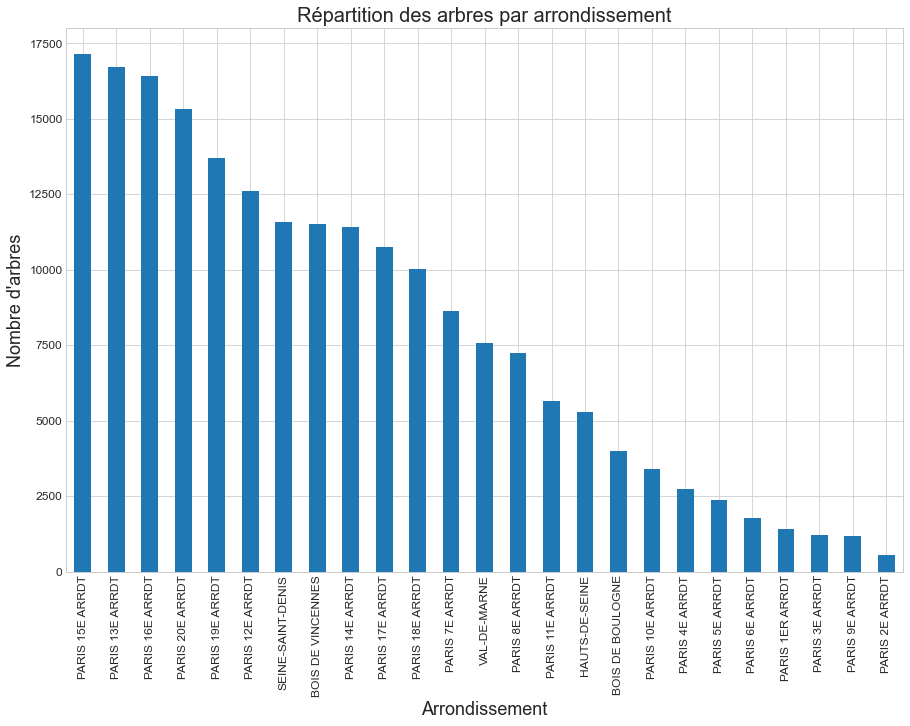

In [16]:
data.arrondissement.value_counts().plot.bar(figsize=dims_fig)
plt.xlabel("Arrondissement")
plt.ylabel("Nombre d'arbres")
plt.title("Répartition des arbres par arrondissement")
plt.show

On voit que la répartition n'est pas uniforme entre les différents arrondissements.

#### Domanialite

<function matplotlib.pyplot.show(close=None, block=None)>

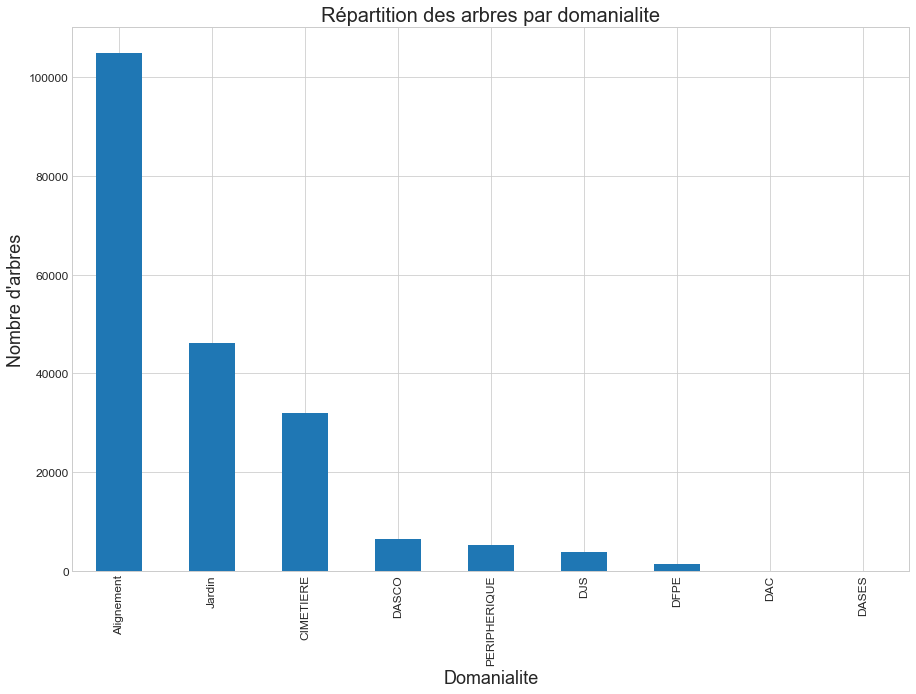

In [17]:
data.domanialite.value_counts().plot.bar(figsize=dims_fig)
plt.xlabel("Domanialite")
plt.ylabel("Nombre d'arbres")
plt.title("Répartition des arbres par domanialite")
plt.show

Ce sont **Alignement, Jardin et Cimetière** qui ressortent le plus souvent

#### Stade de développement

In [18]:
data.stade_developpement.unique()

array([nan, 'A', 'J', 'M', 'JA'], dtype=object)

Les valeurs possibles de la colonne stade_developpement correspondent à :
- Jeune
- Jeune Adulte
- Adulte
- Mature

<function matplotlib.pyplot.show(close=None, block=None)>

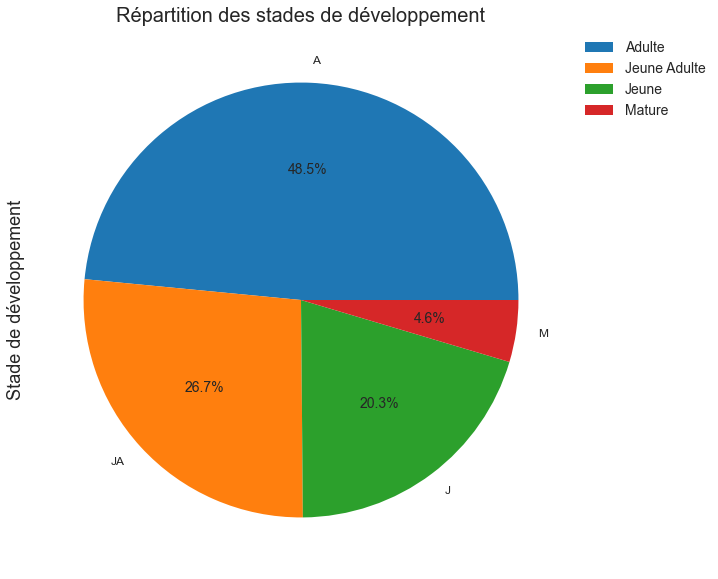

In [19]:
group_name=["Adulte","Jeune Adulte", "Jeune", "Mature"]
data.stade_developpement.value_counts().plot.pie(figsize=dims_fig,
                                                 autopct='%1.1f%%',
                                                 label="Stade de développement")
plt.title("Répartition des stades de développement")
plt.legend(labels=group_name,bbox_to_anchor=(1, 1))
plt.show

 La majorité des arbres sont des arbres Adultes, les arbres Matures sont rares et 20% des arbres viennent d'être plantés

#### Remarquable

In [20]:
data.remarquable.value_counts()

0.0    136848
1.0       184
Name: remarquable, dtype: int64

Seulement **184 arbres** sont Remarquables

<a id="quanti"></a>
### 3.3 Analyse univariée, variables quantitatives

#### Hauteur et Circonférence

In [21]:
data[["circonference_cm", "hauteur_m"]].describe()

circonference_cm      hauteur_m
count     200126.000000  200126.000000
mean          83.382189      13.110810
std          673.208460    1971.271559
min            0.000000       0.000000
25%           30.000000       5.000000
50%           70.000000       8.000000
75%          115.000000      12.000000
max       250255.000000  881818.000000

On voit qu'il y a des valeurs aberrantes :
- 250 255 cm en valeur max pour la circonférence parait impossible
- 881 818 m en valeur max pour la hauteur est aussi impossible
- la valeur mini pour chacun est 0


Il y a donc un filtre à appliquer sur ces valeurs aberrantes


In [22]:
data_zero = data[["circonference_cm", "hauteur_m"]]
result = data_zero[data_zero == 0].count()
print(result)

print(f"\n% de valeurs à 0 :\n- Circonférence : {result[0]/data.shape[0]*100} %,\n- Hauteur :  {result[1]/data.shape[0]*100} %")

circonference_cm    25860
hauteur_m           39212
dtype: int64

% de valeurs à 0 :
- Circonférence : 12.921859228685928 %,
- Hauteur :  19.593655996722063 %


- **12.9 %** des valeurs de circonférence_cm sont à 0
- **19.6%** des valeurs de hauteur_m sont à 0

On ne tiendra donc pas compte des valeurs à 0 pour l'étude qui va suivre

In [23]:
data_circonference = data.circonference_cm
data_hauteur = data.hauteur_m

<function matplotlib.pyplot.show(close=None, block=None)>

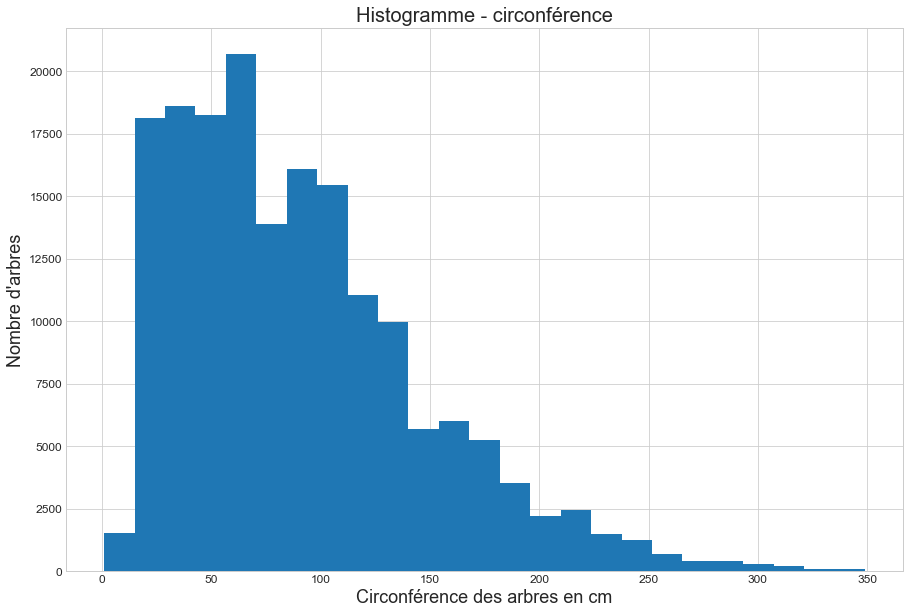

In [24]:
data_circonference[(data_circonference < 350) & (data_circonference > 0)].hist(figsize=dims_fig, bins=25)
plt.xlabel("Circonférence des arbres en cm")
plt.ylabel("Nombre d'arbres")
plt.title("Histogramme - circonférence")
plt.show

La distribution de la circonférence des arbres n'est pas uniforme et décroit au fur et à mesure que la circonférence augmente.

<function matplotlib.pyplot.show(close=None, block=None)>

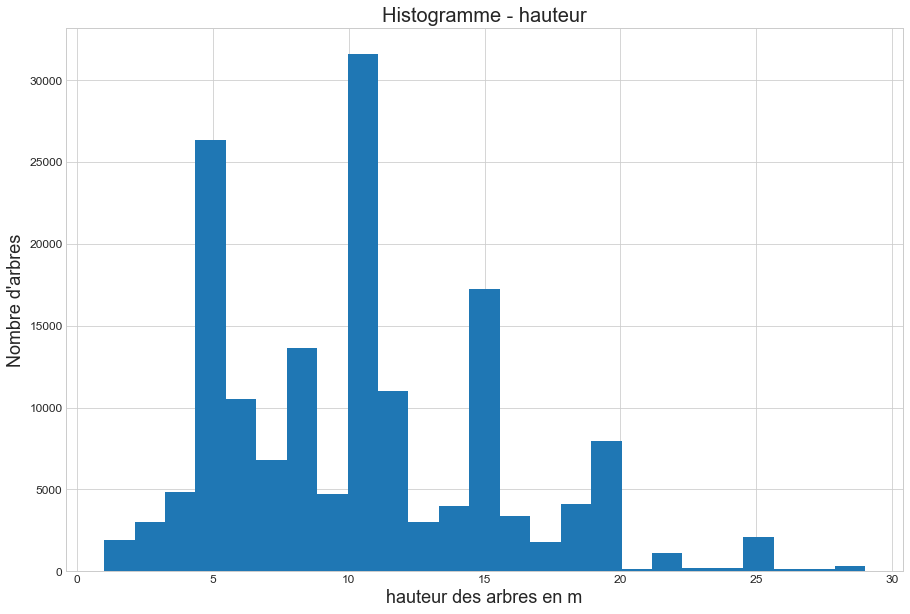

In [25]:
data_hauteur[(data_hauteur < 30) & (data_hauteur > 0)].hist(figsize=dims_fig, bins=25)
plt.xlabel("hauteur des arbres en m")
plt.ylabel("Nombre d'arbres")
plt.title("Histogramme - hauteur")
plt.show

La distribution de la hauteur des arbres est un peu plus irrégulière et finit par décroitre quand la hauteur augmente

<a id="aberrantes"></a>
### 3.4 Valeurs aberrantes

#### Identification des outliers avec l'écart inter-quartiles

L’écart interquartile est une mesure de dispersion qui s'obtient en faisant la différence entre le troisième et le premier quartile : EI = Q₃ - Q₁.
L'EI est un estimateur statistique robuste.
Le 1er quartile est la donnée de la série qui sépare les 25 % inférieurs des données
Le 3e quartile est la donnée de la série qui sépare les 75 % inférieurs des données

Formule : **EI = Q3 - Q1**

In [26]:
Q1 = data[["circonference_cm", "hauteur_m"]].quantile(0.25)
Q3 = data[["circonference_cm", "hauteur_m"]].quantile(0.75)
EI = Q3 - Q1
EI

circonference_cm    85.0
hauteur_m            7.0
dtype: float64

Les outliers sont déterminés à partir d'une formule utilisant l'écart-intercartiles EI, on considère les valeurs aberrantes comme ceci :
- Les valeurs en dessous de **Q1 - 1.5*EI**
- Les valeurs au dessus de **Q3 + 1.5*EI**

In [27]:
limit_inf = Q1 - 1.5*EI
limit_sup = Q3 + 1.5*EI

print(f"Limite supérieure : \n{limit_sup}\n\nLimite inférieure : \n{limit_inf}")

Limite supérieure : 
circonference_cm    242.5
hauteur_m            22.5
dtype: float64

Limite inférieure : 
circonference_cm   -97.5
hauteur_m           -5.5
dtype: float64


In [28]:
outliers = (data[["circonference_cm", "hauteur_m"]] < (Q1 - 1.5 * EI)) | (data[["circonference_cm", "hauteur_m"]] > (Q3 + 1.5 * EI))
outliers

circonference_cm  hauteur_m
0                  False      False
1                  False      False
2                  False      False
3                  False      False
4                  False      False
...                  ...        ...
200132             False      False
200133             False      False
200134             False      False
200135             False      False
200136             False      False

[200126 rows x 2 columns]

In [29]:
outliers.mean()*100

circonference_cm    1.703427
hauteur_m           1.949772
dtype: float64

D'après ces calculs il en ressort :
- **1.70%** des valeurs de circonference_cm sont aberrantes
- **1.95%** des valeurs de hauteur_m sont aberrantes


#### Visualisation des outliers avec les boîtes à moustaches

Text(0.5, 1.0, 'Boite à moustaches pour la Circonférence')

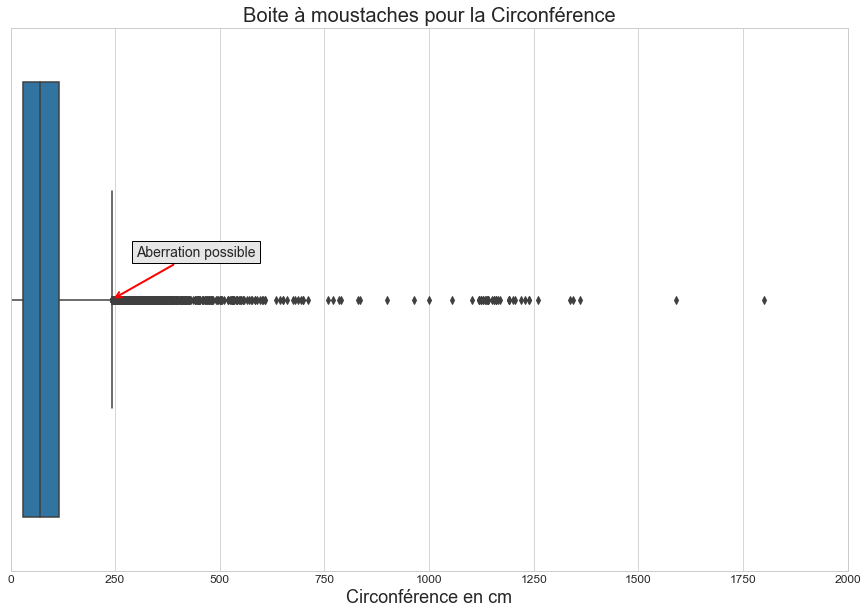

In [30]:
fig= plt.figure(figsize=dims_fig)
ax = sns.boxplot(x=data['circonference_cm'])
ax.set(xlim=(0,2000))

ax.annotate('Aberration possible',
            xy=(242.5,0),
            xytext=(300,-0.08),
            arrowprops=dict(arrowstyle='->', ec='red', lw=2),
            bbox=dict(boxstyle="square", fc="0.9"))

plt.xlabel("Circonférence en cm")
plt.title("Boite à moustaches pour la Circonférence")

Aberration possible à partir de **242.5cm**

Text(0.5, 1.0, 'Boite à moustaches pour la Hauteur')

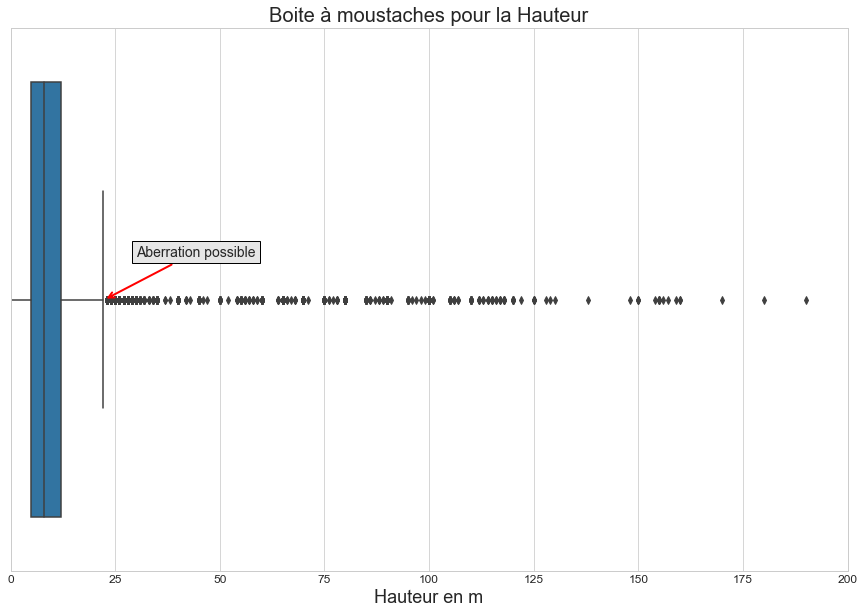

In [31]:
fig= plt.figure(figsize=dims_fig)
ax = sns.boxplot(x=data['hauteur_m'])
ax.set(xlim=(0,200))

ax.annotate('Aberration possible',
            xy=(22.5,0),
            xytext=(30,-0.08),
            arrowprops=dict(arrowstyle='->', ec='red', lw=2),
            bbox=dict(boxstyle="square", fc="0.9"))

plt.xlabel("Hauteur en m")
plt.title("Boite à moustaches pour la Hauteur")

Aberration possible à partir de **22.5m**

La visualisation des valeurs aberrantes via des boîtes à moustache nous retourne les même résultats que le calcul des valeurs aberrantes via la formule utilisée un peu plus haut.

<a id="bivariee"></a>
### 3.5 Analyse bivariée, circonférence et hauteur des arbres

Text(0.5, 1.0, 'Relation entre Hauteur, Circonférence et Stade de développement')

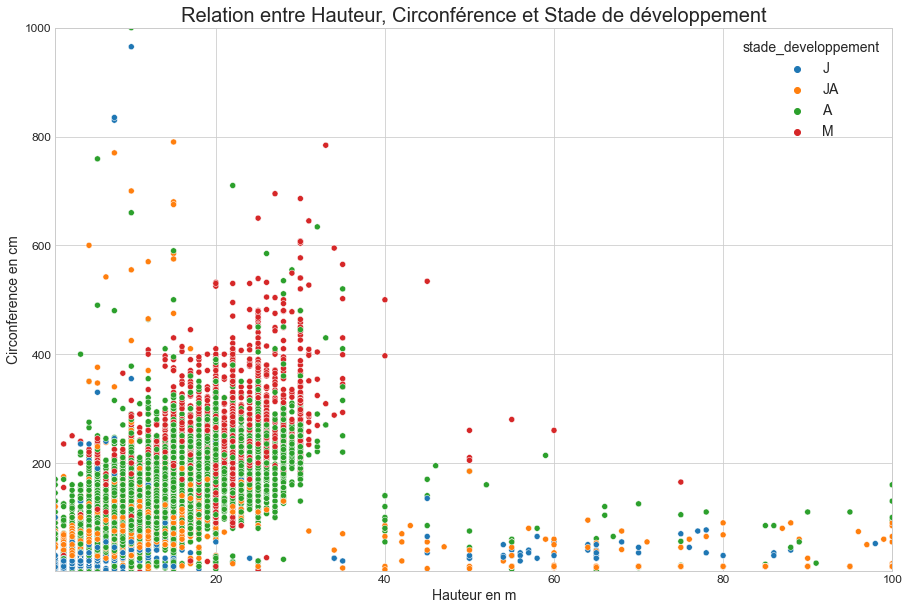

In [32]:
fig = plt.figure(figsize=dims_fig)
ax = sns.scatterplot(x='hauteur_m',
                     y='circonference_cm',
                     data=data,
                     hue="stade_developpement",
                     hue_order=['J', 'JA', 'A', 'M'])
ax.set(xlim=(1, 100), ylim=(1, 1000))

plt.xlabel('Hauteur en m', fontsize=14)
plt.ylabel('Circonference en cm', fontsize=14)
plt.title('Relation entre Hauteur, Circonférence et Stade de développement', fontsize=20)

La relation entre la hauteur et la circonférence est relativement linéaire.

Les arbres qui ne suivent pas cette linéarité (faible circonférence et grande hauteur et inversement), font certainement partie des valeurs aberrantes, car ils ne suivent pas le modèle. Elles n'ont pas été detectées dans la partie précédente avec la formule en utilisant l'écart inter-quartile.
Une étude plus appronfie serait nécessaire pour mieux déterminer les outliers, en étudiant par exemple les diférentes espèces d'arbres.

On voit aussi clairement une corrélation entre circonférence / hauteur des arbres et leur stade le développement en observant la répartition des couleurs sur le graphique.

Text(0.5, 1.0, 'Relation entre Hauteur, Circonférence et Arbre remarquable')

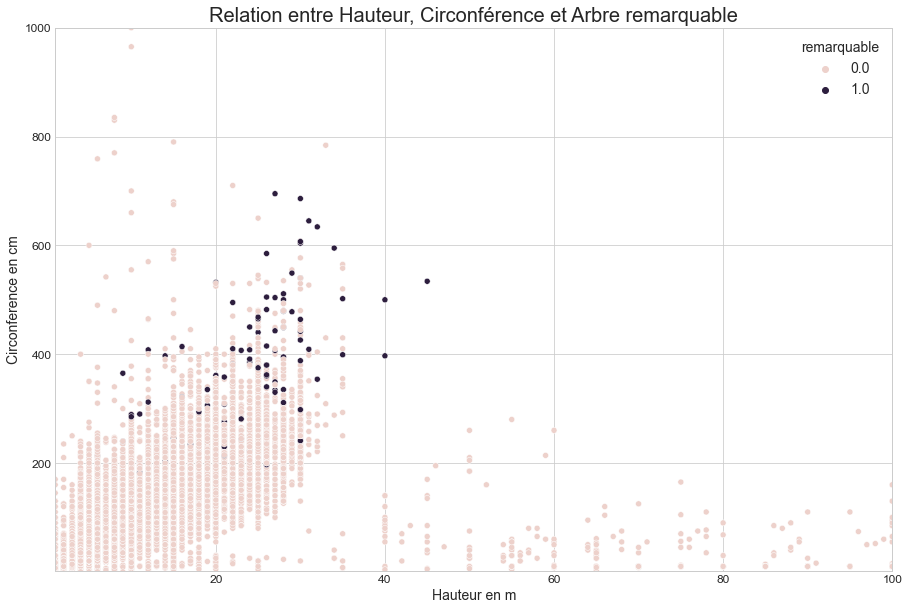

In [33]:
fig = plt.figure(figsize=dims_fig)
ax = sns.scatterplot(x='hauteur_m',
                     y='circonference_cm',
                     data=data,
                     hue="remarquable",
                     hue_order=['R'])
ax.set(xlim=(1, 100), ylim=(1, 1000))

plt.xlabel('Hauteur en m', fontsize=14)
plt.ylabel('Circonference en cm', fontsize=14)
plt.title('Relation entre Hauteur, Circonférence et Arbre remarquable', fontsize=20)

On peut voir que les arbres remarquables font partie des arbres les plus hauts et avec la plus grands circonférence

<a id="geo"></a>
### 3.6 Analyse géographique

On va ici simplement afficher la répartition des arbres dans Paris de deux manières différentes :
- Avec un nuage de points
- En utilisant la librairie folium superposée par une Heatmap (représentant la différente densité des arbres avec des couleurs)

#### Nuage de points

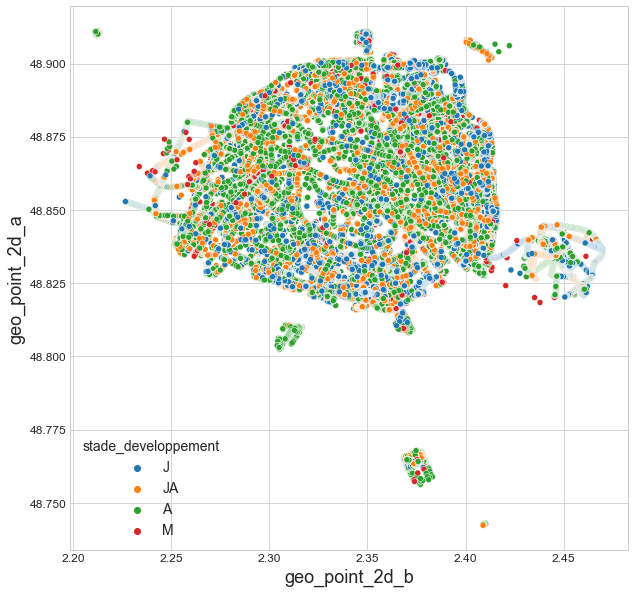

In [34]:
fig = plt.figure(figsize=(10,10))
ax = sns.scatterplot(data=data,
                x="geo_point_2d_b",
                y="geo_point_2d_a",
                hue='stade_developpement',
                hue_order=['J', 'JA', 'A', 'M'])

#### Heatmap

In [35]:
#Chargement de la map centrée sur les coordonnées géographiques de Paris
m = folium.Map(location=[48.8534, 2.3488],zoom_start=12)
#On ajoute une Heatmap représentant la densité d'arbres
HeatMap(data=data[['geo_point_2d_a','geo_point_2d_b']], radius=8).add_to(m)
m

<a id="section4"></a>
## 4. Synthèse de l'analyse de données


On aurait pu pousser l'analyse beaucoup plus loin mais ce n'était pas l'objectif de ce projet.

Un jeu de données peut donner énormément d'informations, il faut être capable de déterminer ce que l'on peut ou veut faire avec un jeu de données, l'analyse de données est une partie importante, il faut donc bien procéder pour obtenir les meilleurs résultats possibles.

Ici il aurait été possible d'approfondir l'analyse pour trouver des corrélations entre d'autres variables, permettre d'améliorer la partie nettoyage en imputant les valeurs NaN, et pousser l'étude en y ajoutant une ou plusieurs dimensions.